In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#import xgboost as xgb
#import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
import eli5
from functools import reduce
import warnings
import gc
warnings.filterwarnings('ignore')
#import shap

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train = pd.read_csv('processed_train.csv')
test = pd.read_csv('processed_test.csv')
gc.collect()

11

In [3]:
train['revenue_log'] = np.log(train['revenue'])

# Revenue

Text(0.5, 1.0, 'Log Revenue Distribution')

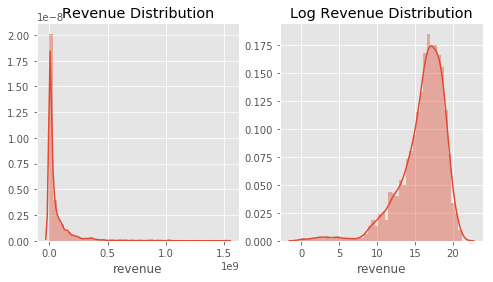

In [4]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
sns.distplot(train['revenue'])
ax.set_title('Revenue Distribution')

ax = fig.add_subplot(1,2,2)
sns.distplot(np.log(train['revenue']))
ax.set_title('Log Revenue Distribution')

# Budget

Text(0.5, 1.0, 'Test Revenue Budget Distribution')

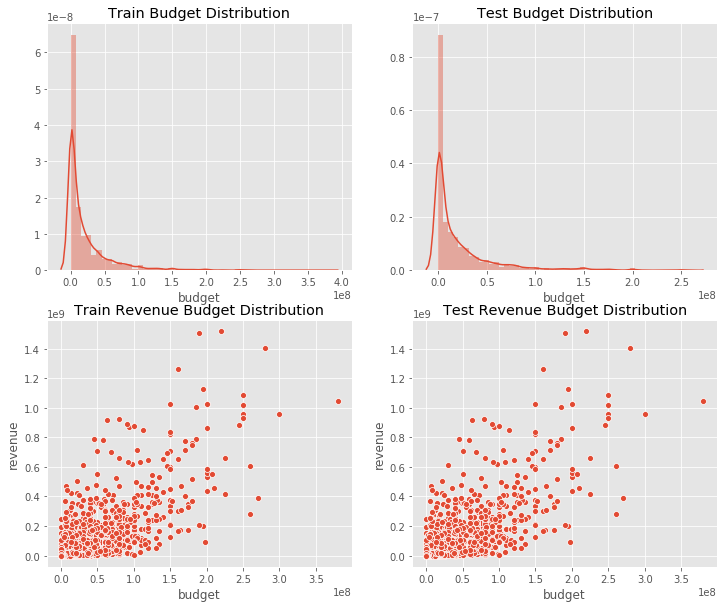

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(2,2,1)
sns.distplot(train['budget'])
ax.set_title('Train Budget Distribution')

ax = fig.add_subplot(2,2,2)
sns.distplot(test['budget'])
ax.set_title('Test Budget Distribution')

ax = fig.add_subplot(2,2,3)
sns.scatterplot(train['budget'], train['revenue'])
ax.set_title('Train Revenue Budget Distribution')

ax = fig.add_subplot(2,2,4)
sns.scatterplot(train['budget'], train['revenue'])
ax.set_title('Test Revenue Budget Distribution')

# Homepage

Text(0.5, 1.0, 'Test Homepage Count')

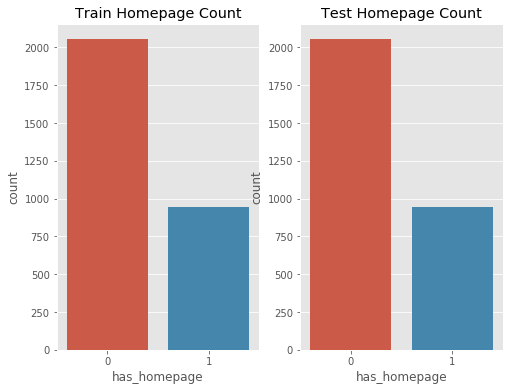

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,2,1)
sns.countplot(train['has_homepage'])
ax.set_title('Train Homepage Count')

ax = fig.add_subplot(1,2,2)
sns.countplot(train['has_homepage'])
ax.set_title('Test Homepage Count')

# Original_language

KeyError: 'original_language_en'

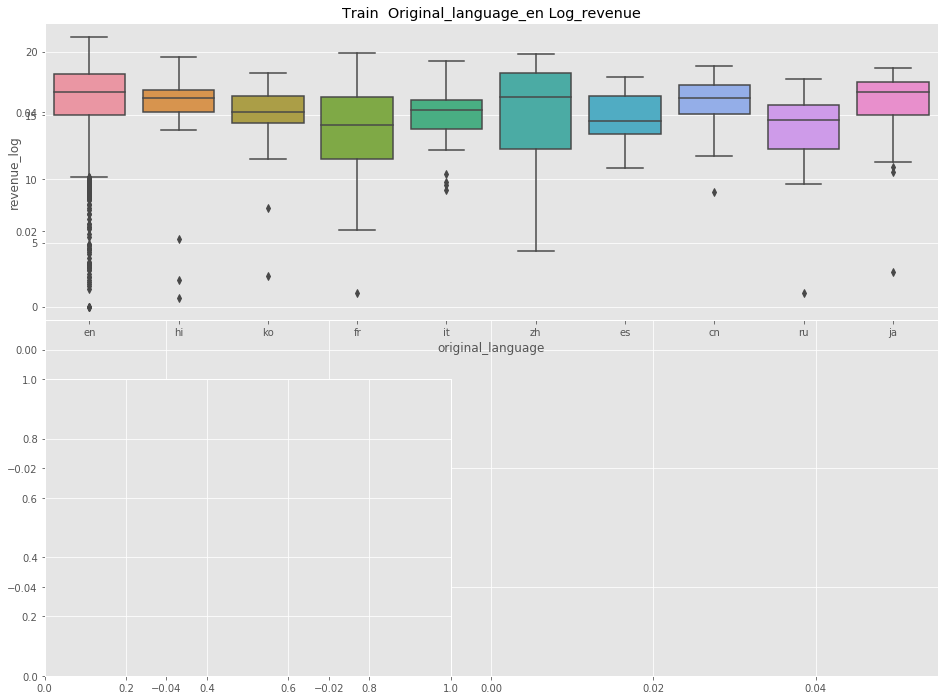

In [7]:
fig = plt.figure(figsize=(16,12))
plt.autoscale()
ax = fig.add_subplot(2,1,1)
sns.boxplot(x='original_language', y='revenue_log', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
ax = ax.set_title('Train  Original_language_en Log_revenue')

ax = fig.add_subplot(2,2,3)
sns.countplot(train['original_language_en'])
ax = ax.set_title('Train Count Original_language_en')

ax = fig.add_subplot(2,2,4)
sns.boxenplot(x = train['original_language_en'], y = train['revenue'])
ax = ax.set_title('Train Original_language_en Revenue')


# original_title

KeyError: 'original_title_top_count'

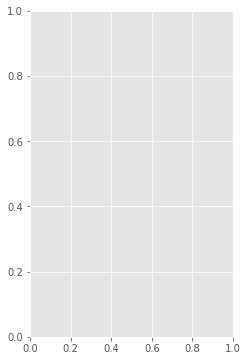

In [8]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,2,1)
sns.boxplot(train['original_title_top_count'], train['revenue'])

ax = fig.add_subplot(1,2,2)
sns.boxplot(train['original_title_top_count'], train['revenue_log'])

# Overview

# Release_Date

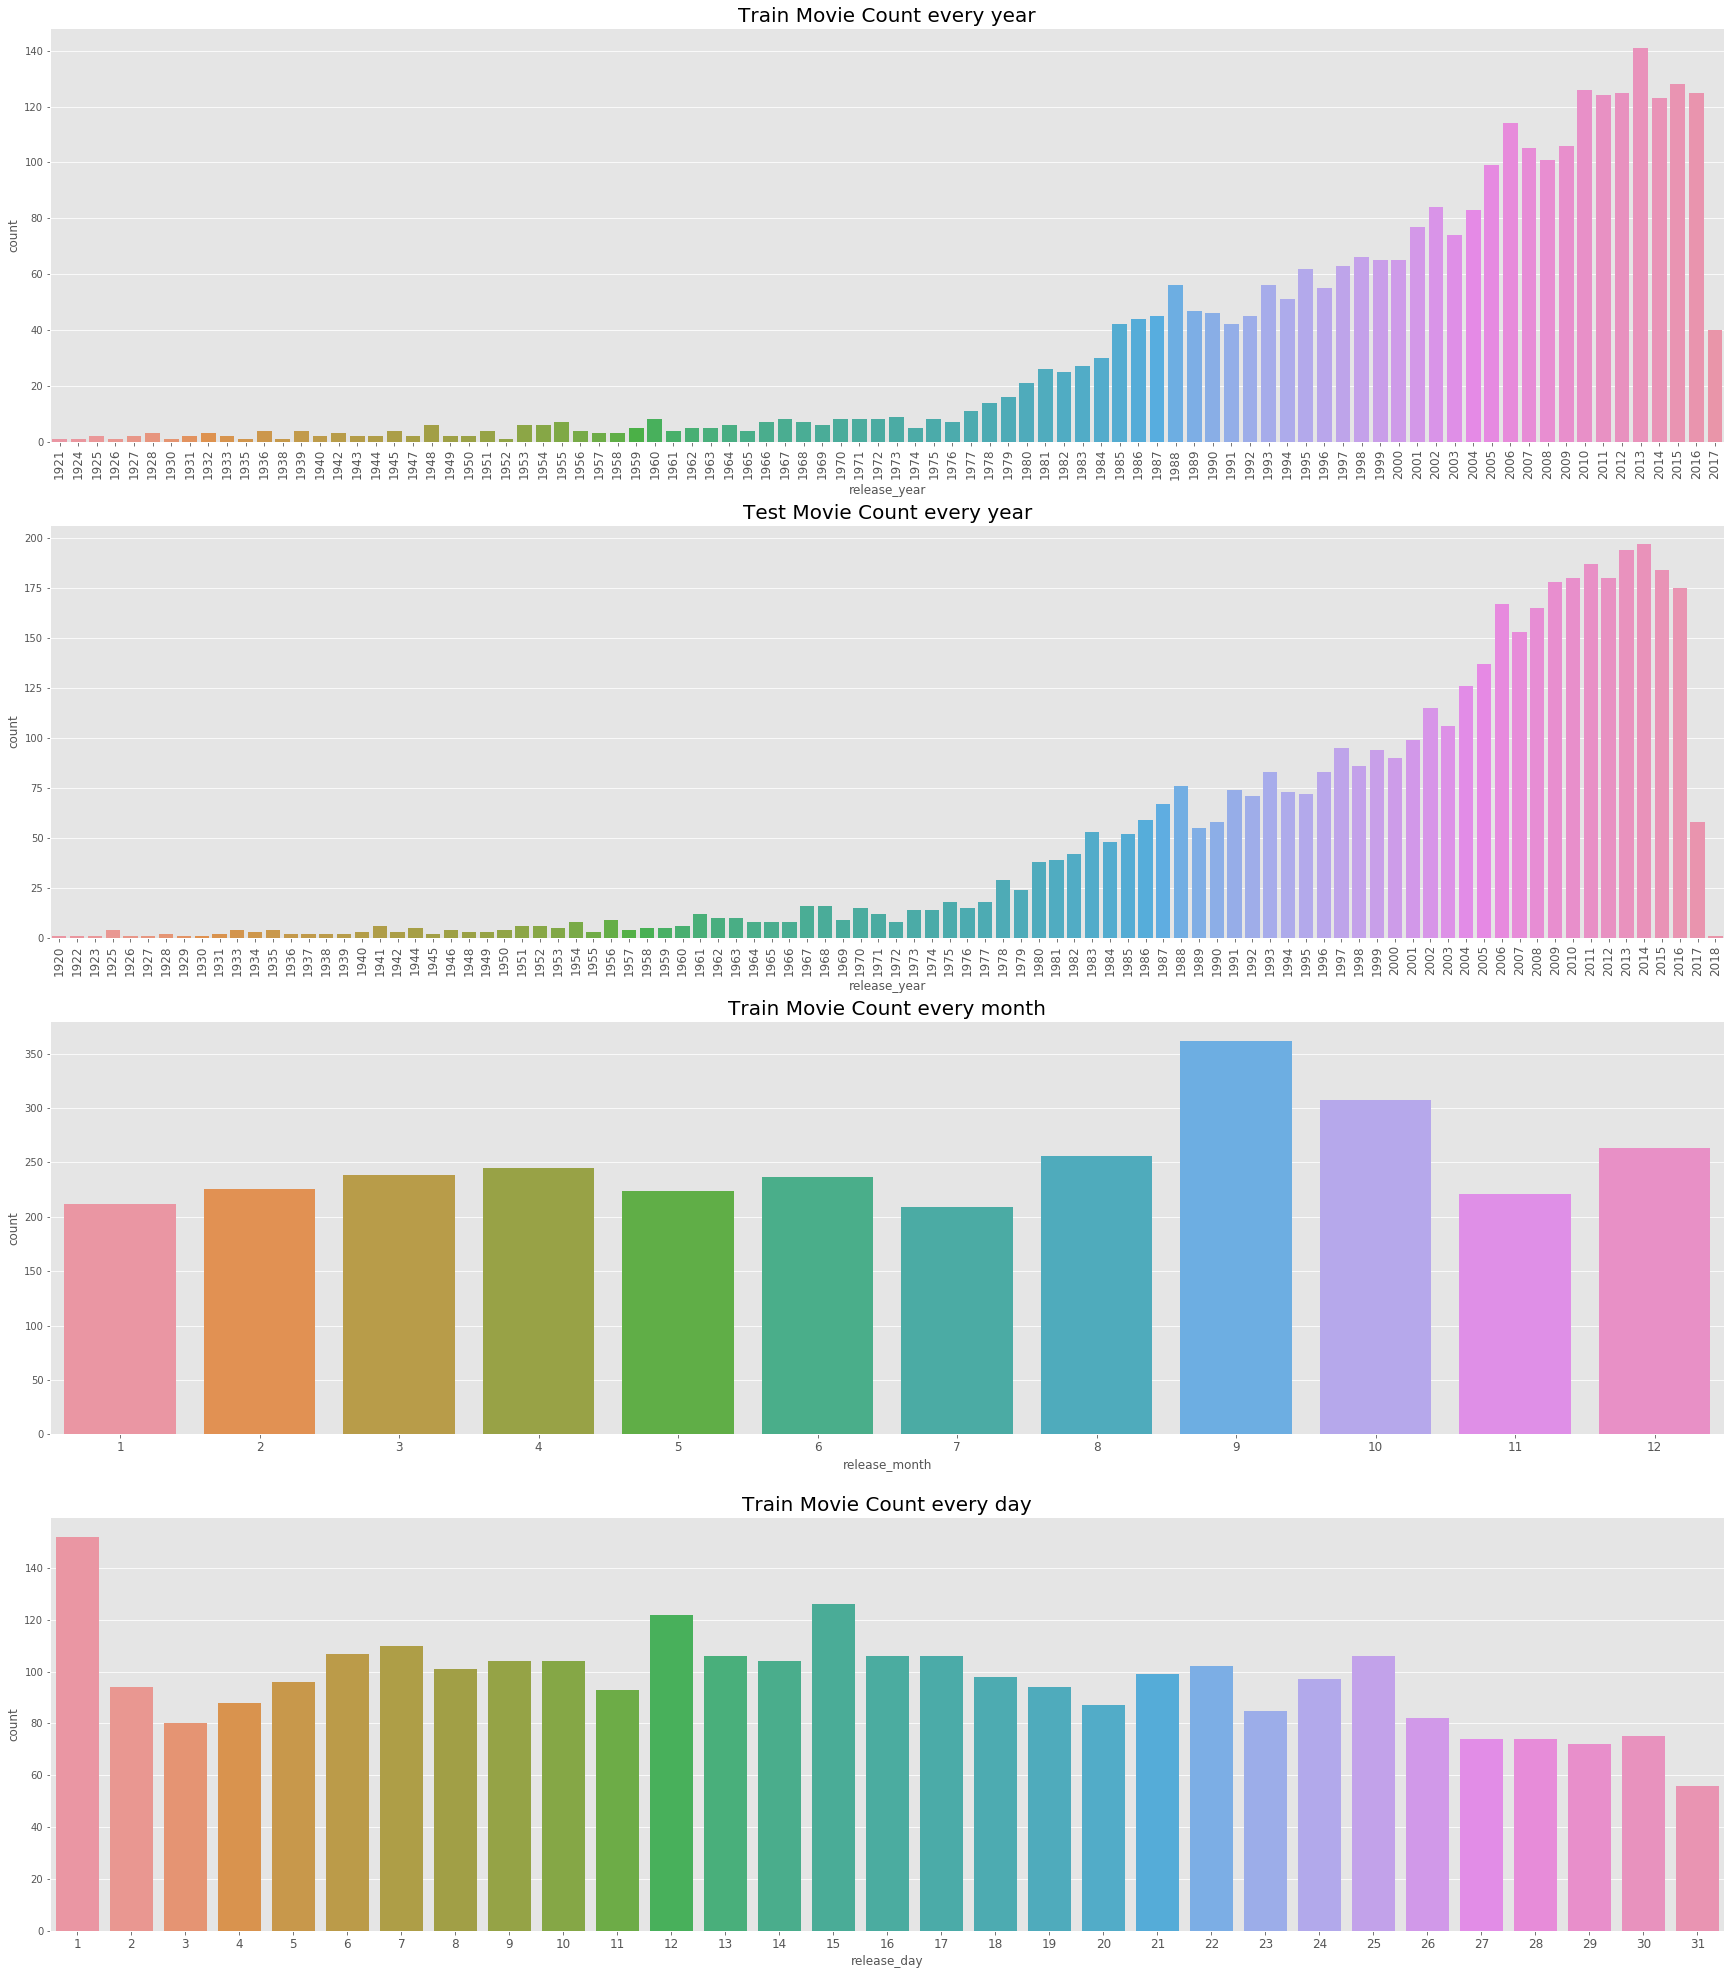

In [9]:
fig = plt.figure(figsize=(30,35))

ax = fig.add_subplot(4,1,1)
sns.countplot(train['release_year'])
plt.title('Train Movie Count every year', fontdict={'fontsize' : 20})
_ = plt.xticks(fontsize =12, rotation =90)

ax = fig.add_subplot(4,1,2)
test = test[test['release_year'].notna()]
sns.countplot(test['release_year'])
plt.title('Test Movie Count every year', fontdict={'fontsize' : 20})
_ = plt.xticks(fontsize =12, rotation =90)

ax = fig.add_subplot(4,1,3)
sns.countplot(train['release_month'])
plt.title('Train Movie Count every month', fontdict={'fontsize' : 20})
_ = plt.xticks(fontsize =12)

ax = fig.add_subplot(4,1,4)
sns.countplot(train['release_day'])
plt.title('Train Movie Count every day', fontdict={'fontsize' : 20})
_ = plt.xticks(fontsize =12)

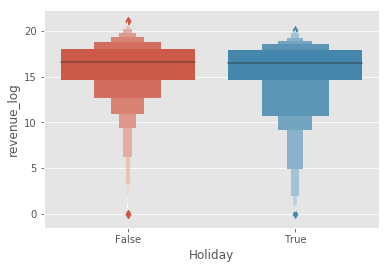

In [13]:
sns.boxenplot(train['Holiday'], train['revenue_log'])

# Runtime

Text(0.5, 1.0, 'Test runtime distribution')

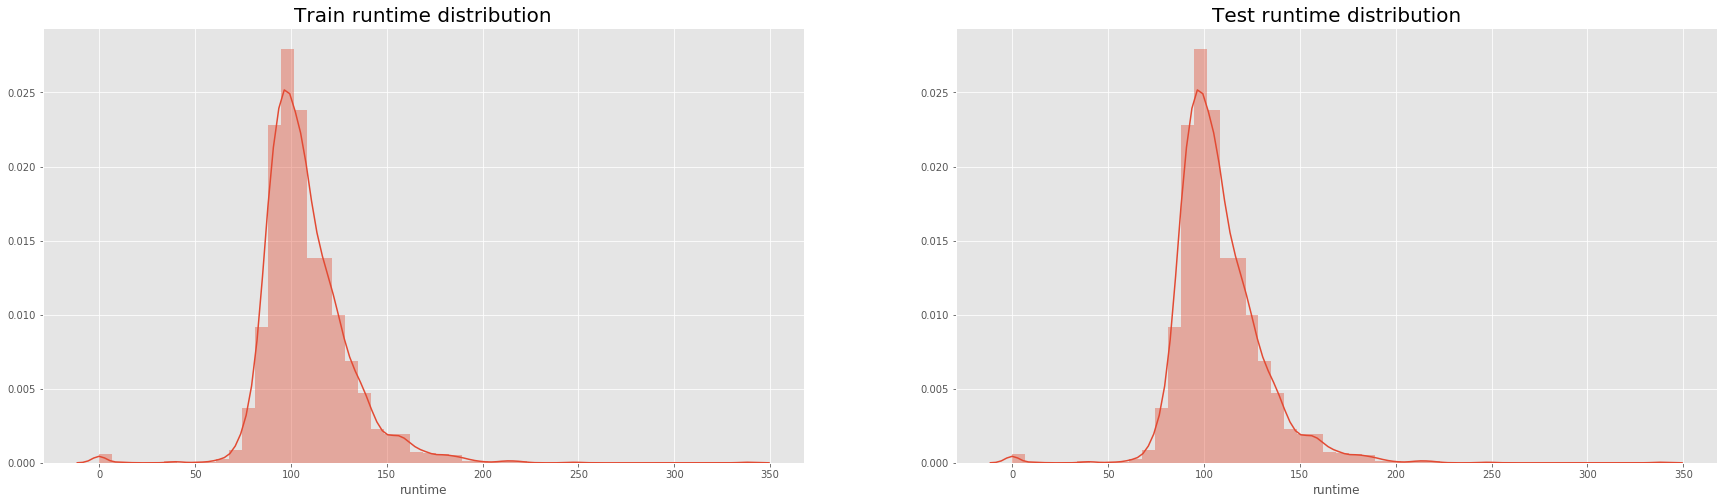

In [14]:
train['runtime'].fillna(train['runtime'].median(), inplace = True)
test['runtime'].fillna(test['runtime'].median(), inplace = True)

fig = plt.figure(figsize=(30,8))

ax = fig.add_subplot(1,2,1)
sns.distplot(train.loc[train['runtime'].notna(), 'runtime'])
ax.set_title('Train runtime distribution', fontdict = {'fontsize' :20})

ax = fig.add_subplot(1,2,2)
sns.distplot(train.loc[test['runtime'].notna(), 'runtime'])
ax.set_title('Test runtime distribution', fontdict = {'fontsize' :20})


# Budget

Text(0.5, 1.0, 'Test budget distribution')

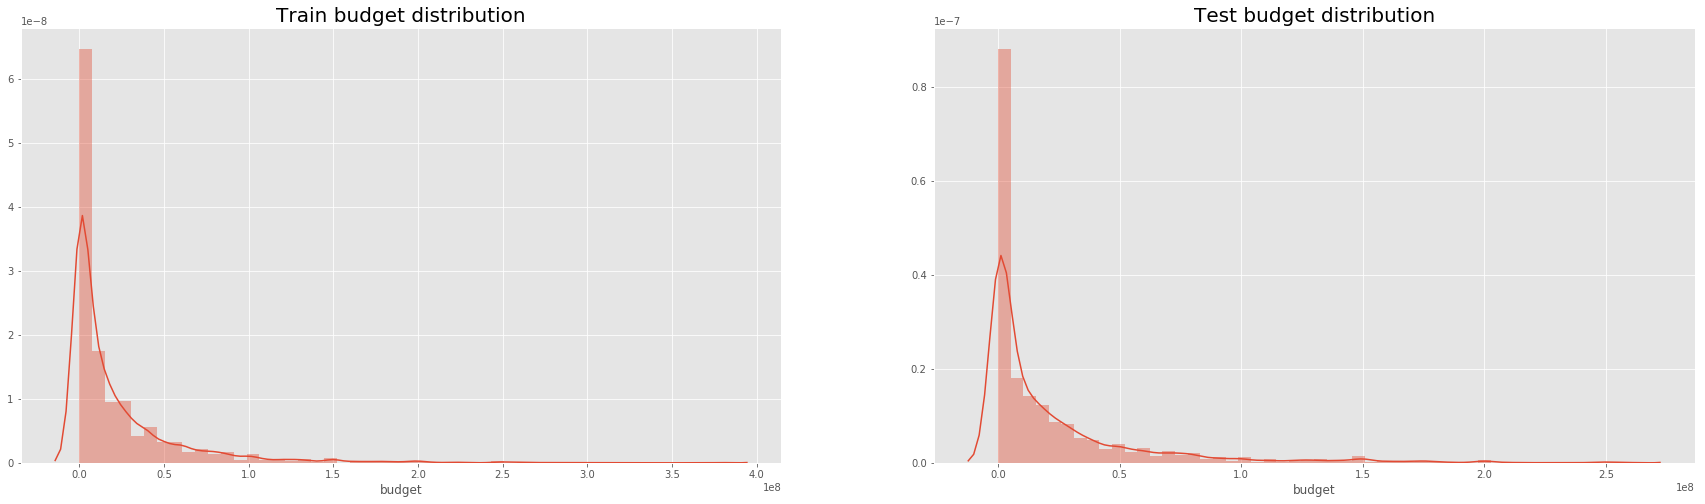

In [15]:
train['runtime'].fillna(train['runtime'].median(), inplace = True)
test['runtime'].fillna(test['runtime'].median(), inplace = True)

fig = plt.figure(figsize=(30,8))

ax = fig.add_subplot(1,2,1)
sns.distplot(train.loc[train['budget'].notna(), 'budget'])
ax.set_title('Train budget distribution', fontdict = {'fontsize' :20})

ax = fig.add_subplot(1,2,2)
sns.distplot(test.loc[test['budget'].notna(), 'budget'])
ax.set_title('Test budget distribution', fontdict = {'fontsize' :20})


# Collection

Text(0.5, 1.0, 'Train collection_name_count revenue')

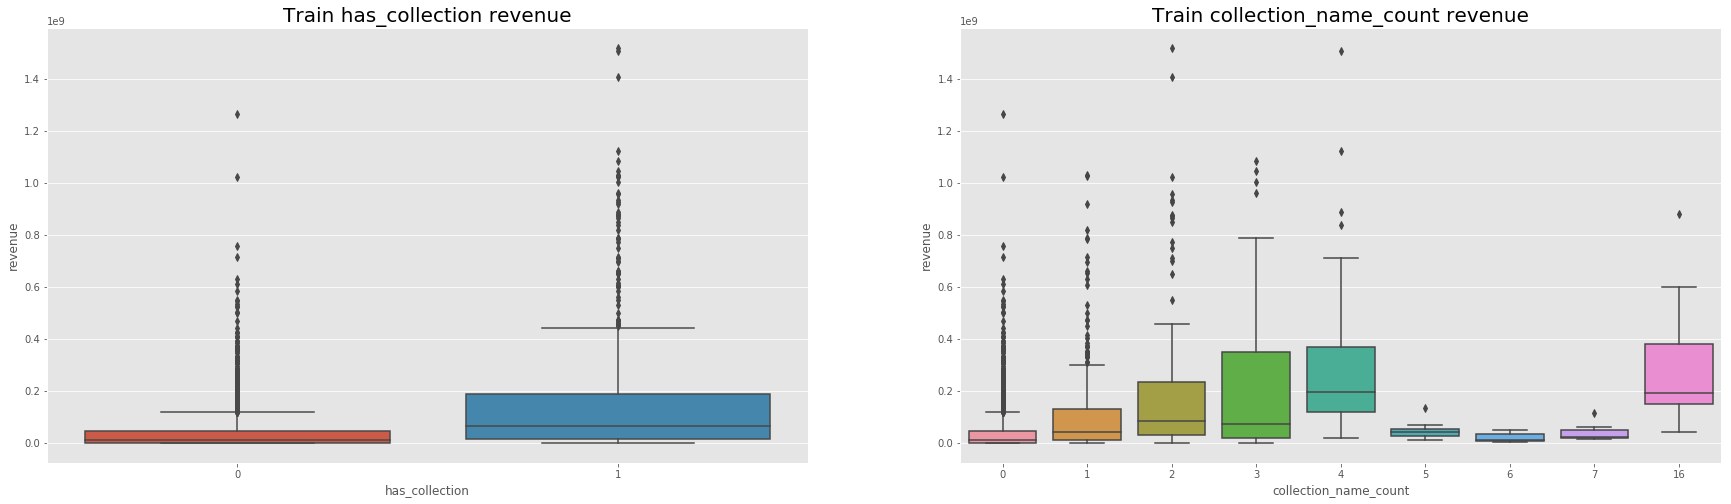

In [16]:
collect_cols = [i for i in train.columns if 'collect' in i]

fig = plt.figure(figsize=(30,8))
ax = fig.add_subplot(1,2,1)
sns.boxplot(train['has_collection'], train['revenue'])
ax.set_title('Train has_collection revenue', fontdict = {'fontsize' :20})

ax = fig.add_subplot(1,2,2)
sns.boxplot(train['collection_name_count'], train['revenue'])
ax.set_title('Train collection_name_count revenue', fontdict = {'fontsize' :20})


# Genres 

In [17]:
genre_cols = [i for i in train.columns if 'genre' in i]
for i in genre_cols:
    print(train[i].value_counts())

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genre_count, dtype: int64
1    1531
0    1469
Name: genre_Drama, dtype: int64
0    1972
1    1028
Name: genre_Comedy, dtype: int64
0    2211
1     789
Name: genre_Thriller, dtype: int64
0    2259
1     741
Name: genre_Action, dtype: int64
0    2429
1     571
Name: genre_Romance, dtype: int64


In [25]:
train[train['budget']< 1000]['release_year'].mean()

1998.7312883435584

In [27]:
train[train['budget']< 1000]['release_year'].median()

2002.0

In [29]:
train[train['budget']< 1000]['release_year'].std()

15.396964830102362

In [26]:
train[train['budget'] > 1000]['release_year'].mean()

2000.079176201373

In [28]:
train[train['budget'] > 1000]['release_year'].median()

2004.0

In [30]:
train[train['budget'] > 1000]['release_year'].std()

15.420647973948087

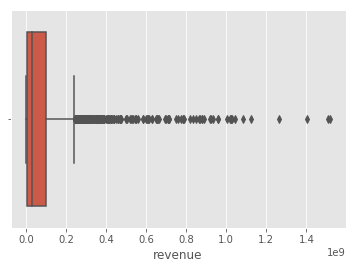

In [34]:
sns.boxplot(train[train['budget'] > 1000]['revenue'])

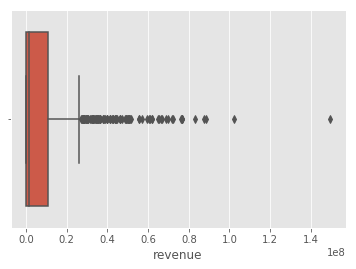

In [35]:
sns.boxplot(train[train['budget'] < 1000]['revenue'])